# DL_comp3_全_report

## Member

- 邱煒甯, 108072244
- 劉祥暉, 109072142
- 簡佩如, 112065525
- 陳凱揚, 108032053

## 1. Data Augmentation
- 1 張 image 會對應到 1-10 個 caption，原本是隨機選擇一個 caption 作為 data，我們改成每個 caption 都採用，並對應到相同的 image，將資料量提升到了約 7 萬筆。
- 在建立 dataset 前，把原先使用一串 token id 代表的 caption，透過 `id2Word.npy` 還原成 string，並使用我們的 `text_encoder` 將其轉換成 size 為 768 的 hidden representation。
- 對 image 做各種 random 調整，包括 `random_flip_left_right`, `random_flip_up_down`, `random_brightness` 和 `random_crop`。
- 將 dataset 重複 3 遍，讓資料量提升至 21 萬筆。

## 2. Model

### 2.1 Text Encoder
使用 pretrain model `TFAutoModel` 中的 `sentence-transformers/paraphrase-multilingual-mpnet-base-v2`，並將 output 做 mean pooling 及 normalize，使用前用到的的 tokenizer 也是從 `AutoTokenizer` 中對應的 `sentence-transformers/paraphrase-multilingual-mpnet-base-v2` load pretrain weight。

### 2.2 WGAN-GP
參考了 lab13 中用到的 [wgan-gp-tensorflow](https://github.com/henry32144/wgan-gp-tensorflow/tree/master)，加入 text embedding 讓他變成 conditional GAN，embedding 在與 img concate 之前會先依序接上 `Dense(384)`, `BatchNormalization` 和 `LeakyReLU`。

在 generator 中會馬上和 input 的 noise z concate 起來，而在 discriminator 中則會等 image 先經過一連串的 `Conv2D` 直到其 size 剩下`4*4*512`，再將 embedding 從 `384` reshape 為 `4*4*24`，concate 起來後 size 則為 `4*4*536`，最後再經過一層 `Conv2D` 後，使用 `Dense(1)` output結果。

## 3. Result
- white petals that become yellow as they go to the center where there is an orange stamen
- this medium white flower has rows of thin blue petals and thick stamen
- the petals are broad but thin at the edges with purple tints at the edges and white in the middle
- this bright pink flower has several fluttery petals and a tubular center
- this flower has numerous stamen ringed by multiple layers of thin pink petals

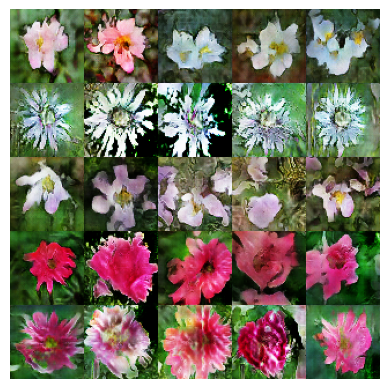

## 4. Conclusion
在一開始我們直接採用了 lab13 的架構來做改寫，並套用基本的 text encoder 來做就能達到 0.61 的成績，但此時我們在 discriminator 中 concate 之後並沒有再做 `Conv2D`，所以也因此卡 0.61 左右很久，一直提升不了成績，花的樣子雖然精緻，但幾乎對應不上文字內容。後來嘗試了許多不同的 pretrain text encoder，並加上缺少的 `Conv2D` 後才終於突破到 0.50 左右，花的樣子也大致上都能符合文字內容，之後就是一連串的 training 和微調 hyperparameter，像是 model 裡 dense 的 neural 個數，讓最終成績成功進步到了 0.47，驚險通過了 TA80 的標準。

## 5. Reference
- Sentence-Transformer: https://www.philschmid.de/tensorflow-sentence-transformers
- WGAN-GP: https://github.com/henry32144/wgan-gp-tensorflow/tree/master